# Regresión Lineal

Felicidades !! Si llegaste hasta aquí, comienza el momento de realizar nuestras primeras predicciones, con el modelo más básico, la regresión lineal

## Modelos de regresión lineal

### Modelo con datos simulados

$y = \alpha + \beta \cdot x$

Donde:
$x$ = 100 valores distribuidos según una $N (1.5, 2.5)$

$y_e = 10 + 3\cdot x + e$

$e$ : es un componente de error, distribuido según una $N (0, 0.8)$


In [1]:
# Importemos nuestras librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definimos las variables
x = 1.5 + 2.5 * np.random.randn(100)
e = 0 + 0.8*np.random.randn(100)
y_act = 10 + 3*x + e

In [3]:
# Creamos nuestro dataframe

x_list = x.tolist()
#y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

data = pd.DataFrame({
    "x": x_list,
    "y_actual": y_act_list
})

data.head()

,x,y_actual
0,2.674151,17.408776
1,3.142386,19.003728
2,2.960494,19.970643
3,5.494891,25.313311
4,-0.021528,8.924667


#### Obteniendo los coeficientes

Debemos estimar el parámetro $y$ como:

$$ y = \alpha + \beta \cdot x$$

Dónde:

* $\beta = \frac{\sum_n^i (x_i - \bar{x})\cdot (y_i - \bar{y})}{\sum_n^i (x_i - \bar{x})^{2}}$

 

* $\alpha = \bar{y} - \beta \cdot \bar{x}$

In [4]:
# Calculamos el numerado y denominador de Beta

data['beta_numerador'] = (data['x']-np.mean(data['x']))*(data['y_actual']-np.mean(data['y_actual']))
data['beta_denominador'] = (data['x']-np.mean(data['x']))**2


In [5]:
# Obtenemos el parámetro beta

beta = sum(data['beta_numerador']) / sum(data['beta_denominador'])

# Con Beta, calculamos alpha

alpha = np.mean(data['y_actual']) - beta * np.mean(data['x'])

# Revisemos los valores

alpha, beta

(9.916619444717842, 3.0412050601865945)

El modelo obtenido por regresión es:

$$ y = 10.009211614499218 + 2.912666370161308 \cdot x$$

Así entonces podemos crear una predicción al dataset

In [6]:
data['y_prediccion'] = alpha + beta*data['x']

In [7]:
data.head()

,x,y_actual,beta_numerador,beta_denominador,y_prediccion
0,2.674151,17.408776,3.892752,1.541480,18.049262
1,3.142386,19.003728,8.087880,2.923407,19.473258
2,2.960494,19.970643,8.704831,2.334497,18.920089
3,5.494891,25.313311,44.847404,16.502301,26.627708
4,-0.021528,8.924667,7.777697,2.114453,9.851149


In [8]:
## Obtengamos algunas métricas para saber como está nuestro modelo

from sklearn.metrics import mean_squared_error, r2_score

In [9]:
mean_squared_error(data['y_actual'], data['y_prediccion'])

0.5990132148836878

In [10]:
r2_score(data['y_actual'], data['y_prediccion'])

0.9891214060483692

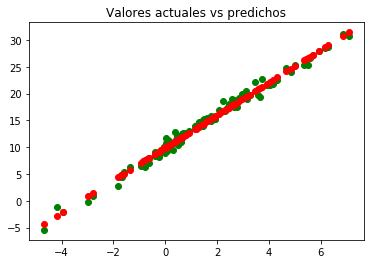

In [11]:
## Realizemos una visualización gráfica

plt.plot(data['x'], data['y_actual'], 'go')
plt.plot(data['x'], data['y_prediccion'], 'ro')
plt.title('Valores actuales vs predichos');

## El paquete statsmodel para regresión lineal simple

Hagamos una regresión lineal en ventas de un producto versus la publicidad en TV

In [12]:
data = pd.read_csv('/Users/fsanmartin/python-ml-course-master/datasets/ads/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
## Importamos la librería

import statsmodels.formula.api as smf

In [14]:
linear_model = smf.ols(formula='Sales~TV', data=data).fit()

In [15]:
linear_model.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería: $Sales = 7.032594 + 0.047537 \cdot TV$

In [16]:
# Veamos el r2 y el r2 ajustado

linear_model.rsquared, linear_model.rsquared_adj

(0.611875050850071, 0.6099148238341623)

In [17]:
# También se puede revisar un resumen de un montón de estadísticos
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           1.47e-42
Time:                        16:32:51   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**¿Y cómo utilizamos el modelo para predecir?** Hagamoslo!

In [18]:
sales_pred = linear_model.predict(pd.DataFrame(data['TV']))
sales_pred.head()

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

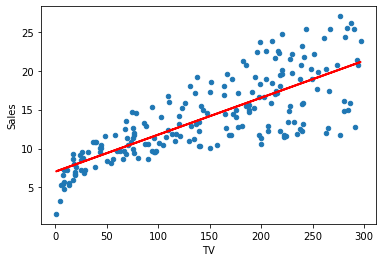

In [19]:
# Revisemos un gráfico con los valores reales vs los predichos

data.plot(kind="scatter", x = 'TV', y = 'Sales')
plt.plot(pd.DataFrame(data['TV']), sales_pred, c='red', linewidth=2);

## El paquete statsmodel para regresión lineal múltiple

Hagamos una regresión lineal en ventas de un producto versus la publicidad en todos los medios del data set

In [20]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [21]:
linear_model_mp = smf.ols(formula='Sales~TV+Radio+Newspaper', data=data).fit()

In [22]:
linear_model_mp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           1.58e-96
Time:                        16:32:51   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
linear_model_mp.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

Estos datos obtenidos, nos indican que el periódico es una variable que empeora el modelo, y por qué? A qué se relaciona esto?

Este es un caso típico de problema de **multicolinealidad**. Para solucionar este problema lo analizamos con el **factor de inflación de la varianza (VIF)**.

Tenemos 3 casos:

* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF > 5 : Las variables están altamente correlacionadas y deben desaparecer del modelo

## Machine learning - Proceso generalizado para aprendizaje supervisado

Es momento de que hagamos un proceso de machine learning con sus fases, es importante recordar que este proceso se puede abstraer para ser aplicable e la mayoría de las casos, donde lo único que pudiese cambiar es el algoritmo.

En este caso en particular utilizaremos una regresión lineal

Vamos entonces!!



### 1. Dividir la Data (muestra)

El primer paso es dividir nuestra muestra en dos grupos:

1. __Entrenamiento__: de donde generamos una aproximación funcional.

2. __Validación__: donde ponemos a prueba nuestra aproximación funcional a nuevos datos.

Es importante saber reconocer que tenemos:
* Un vector objetivo (que es la variable a apredecir, en este caso serían las ventas *Sales*). También se conoce como la variable dependiente

* Y una matriz de atributos, que vendrían siendo todas las demás columnas de nuestro dataframe (en este caso serían las publicidades en *TV, Radio, Newspaper*). También se conocen como variables independientes

**Importando módulos**
Para realizar machine learning utilizaremos **scikit-learn**, una librería con una amplia gama de funciones y modelos para simplificar el flujo de trabajo

In [26]:
# importamos train_test_split
from sklearn.model_selection import train_test_split

df = data

In [27]:
# separemos los vectores a trabajar
y_vec= df.loc[:, 'Sales'] # vector de respuesta 
X_mat = df.drop('Sales', axis=1) # matriz de atributos

In [28]:
# dividimos la muestra en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vec, test_size=.30, random_state=7785)

# Test_size: nos indica el porcentaje a considerar para la muestra de validación,
# en este caso 0.3 es qeuivalente al 30% de la muestra para validación
# Random_state: es nuestra semilla generadora. lo recuerdan?



In [29]:
# Revisamos las dimensiones de los conjuntos 
X_train.shape

(140, 3)

In [30]:
y_train.shape

(140,)

In [31]:
X_test.shape

(60, 3)

In [32]:
y_test.shape

(60,)

In [33]:
X_test.head()

,TV,Radio,Newspaper
51,100.4,9.6,3.6
165,234.5,3.4,84.8
170,50.0,11.6,18.4
137,273.7,28.9,59.7
35,290.7,4.1,8.5


*X_test*: es nuestra matriz de atributos de validación, si se dan cuenta, falta la variable "Sales". Entonces la idea es utilizar los datos de esta matriz de para predecir la variable "Sales", como también tenemos *y_test* podemos comparar los resultados para medir el error de nuestro algoritmo.

In [35]:
y_test.head()

51     10.7
165    11.9
170     8.4
137    20.8
35     12.8
Name: Sales, dtype: float64

### 2. Entrenar el modelo

Para esto, necesitamos escoger un algoritmo a utilizar.

En este caso, implementaremos una regresión lineal (en scikit learn es: *LinearRegresion*), donde específicaremos que deseamos incluir un parámetro para el intercepto y deseamos **normalizar** las variables. ¿Recuerdan lo que es normalizar? Si es así, entonces ¿por qué deberíamos normalizar las variables?

In [36]:
# importar el modulo LinearRegression de sklearn
from sklearn import linear_model

model_1 = linear_model.LinearRegression(fit_intercept=True, normalize=True)  # inicializando objeto 
model_1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [37]:
# Una vez inicializado el objeto con nuestras especificaciones, podemos entrenar el modelo con .fit

model_1.fit(X_train, y_train) # entrenando el modelo inicializado con el set de entrenamiento (x,y)train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [38]:
model_1.coef_ # Obtener los coeficientes estimados mediante el ajuste del modelo

array([ 0.04761283,  0.18838599, -0.00332285])

In [39]:
model_1.intercept_  # valor del intercepto

2.7860984182508925

In [40]:
model_1.normalize

True

### 3. El último paso es generar los puntajes predichos ( ) con .predict

In [41]:
model_1_yhat = model_1.predict(X_test) # predecir con el set de atributos de testing
model_1_yhat

array([ 9.36296967, 14.31004111,  7.29087685, 21.06371042, 17.37128602,
       19.99572235, 16.33849172, 16.7527717 ,  8.05323174,  9.70629967,
       12.39019687, 23.44924954, 11.11765261, 15.67116496, 15.21124759,
       14.9133089 , 15.12418957,  9.02616756, 16.52370167, 17.58539649,
       13.44691966, 13.22424932, 17.29641475, 14.85342399,  7.06972372,
        9.88201077, 14.30708621, 21.91967223, 12.49616054,  8.30316717,
       23.98133537, 10.14441863, 11.52615995, 12.76816742, 18.22559179,
        5.94997629, 14.30769895, 11.32113798, 12.83281736, 13.54757518,
       12.94429255, 17.23111201,  6.43705079,  4.32075013, 19.1987887 ,
       15.56424749, 12.24224814, 15.42824665,  4.32808572, 17.37706678,
       13.8516619 ,  8.39549857, 16.84804274, 11.55025652,  6.24511148,
       20.63285931, 14.23842678,  5.63904766, 15.8980664 , 18.4263597 ])

## Listo !! .... Espera, espera. Aun falta un último paso: ¿Qué tan bueno es el modelo?

### Medir desempeño

* Se comprueba mediante las métricas. 

* Para el caso de la regresión lineal, nuestro objetivo es encontrar una función candidata que minimice las pérdidas, medidas en el Error Cuadrático Promedio.

In [ ]:
# Importamos la librería de métricas de desempeño en Machine Learning

from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# Evaluar qué tan bien se desempeñó el modelo
print(mean_squared_error(y_test, model_1_yhat)) # error cuadratico medio
print(r2_score(y_test, model_1_yhat)) # r cuadrado

2.6533397673973425
0.8685838560414693


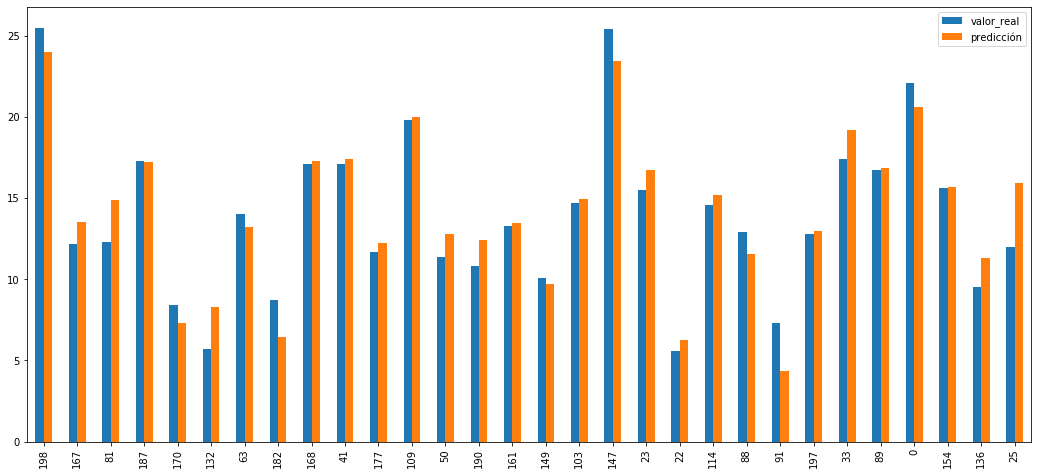

In [47]:
## Hagamos una pequeña gráfica de barras, donde comparamos los valores obtenidos vs los reales

preds_1 = pd.DataFrame({'valor_real':y_test, 'predicción':model_1_yhat})

preds_1.sample(frac=0.5).plot(kind='bar',figsize=(18,8))
plt.grid(linewidth='2')
plt.grid(linewidth='2')
plt.grid(None)
plt.show()

# Felicidades, este es tu primer modelo de Machine Learning!

Una última recomendación es: utiliza este modelo, siempre y cuando la variable que quieras predecir sea **cuantitativa**